### CSE-221710304062-Vaishnavi.B

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [6]:
type(train_labels)

numpy.ndarray

In [4]:
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [7]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

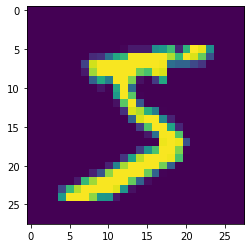

In [8]:
plt.imshow(train_digits[0])

In [11]:
sample=np.random.randint(train_digits.shape[0],size=16)
sample

array([44101, 23502, 28316, 51655, 14836, 38516,  6677, 24708, 39093,
       32781, 38633, 46113, 22581, 32116,  7044, 44346])

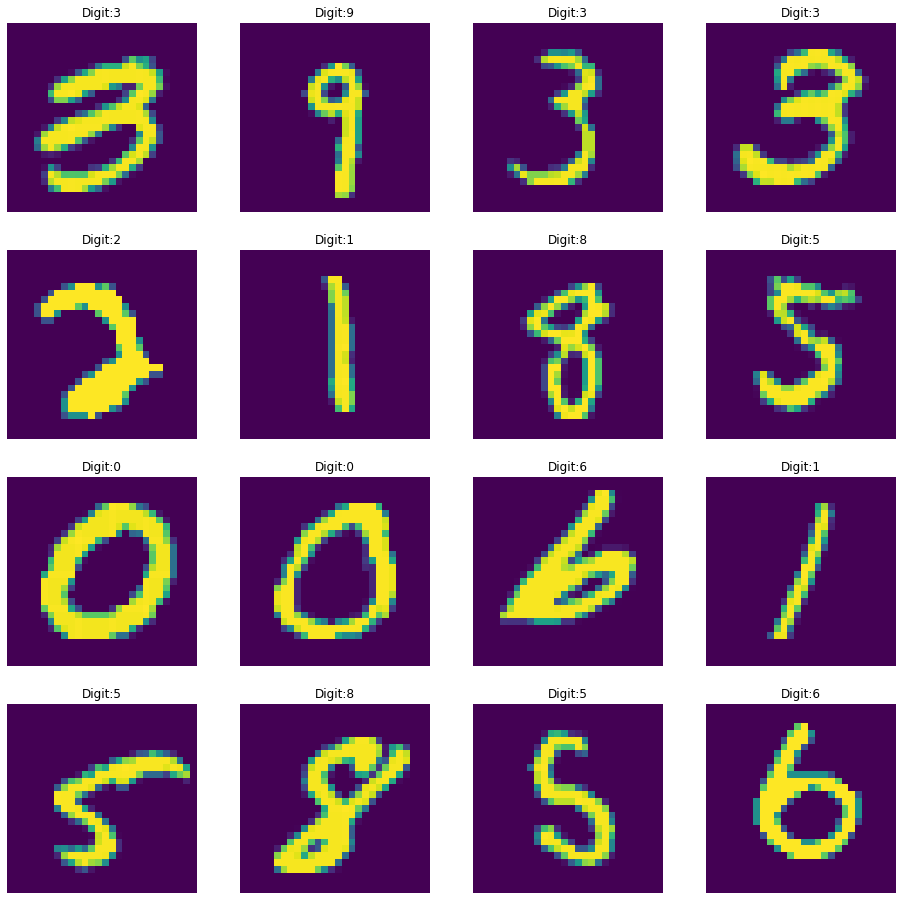

In [13]:
plt.figure(figsize=(16,16))
j=1
for i in sample:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j += 1

In [14]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [15]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [16]:
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels)
test_labels_cat=to_categorical(test_labels)
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


Model 1

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [20]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 125us/step - loss: 0.2470 - accuracy: 0.9246 - val_loss: 0.1632 - val_accuracy: 0.9507
Epoch 2/5
54000/54000 [==============================] - 6s 118us/step - loss: 0.1114 - accuracy: 0.9653 - val_loss: 0.1268 - val_accuracy: 0.9638
Epoch 3/5
54000/54000 [==============================] - 6s 119us/step - loss: 0.0807 - accuracy: 0.9751 - val_loss: 0.1068 - val_accuracy: 0.9708
Epoch 4/5
54000/54000 [==============================] - 7s 122us/step - loss: 0.0638 - accuracy: 0.9799 - val_loss: 0.1084 - val_accuracy: 0.9708
Epoch 5/5
54000/54000 [==============================] - 7s 121us/step - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.1141 - val_accuracy: 0.9730


In [21]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 30us/step


[0.10071307541152345, 0.9724000096321106]

In [22]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [23]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.8393370e-08, 1.0734668e-04, 7.3273775e-05, 5.5444782e-04,
        9.5938354e-08, 5.7122031e-07, 1.5996146e-10, 9.9924612e-01,
        2.8965530e-06, 1.5236819e-05]], dtype=float32)

In [24]:
model.predict(test_digits_sc[:10])


array([[3.83935195e-08, 1.07346881e-04, 7.32739209e-05, 5.54449158e-04,
        9.59385389e-08, 5.71221392e-07, 1.59961766e-10, 9.99246120e-01,
        2.89655577e-06, 1.52368493e-05],
       [3.45980102e-12, 7.96886638e-07, 9.99998569e-01, 5.78158335e-07,
        1.50653856e-09, 5.76284742e-10, 2.26943672e-10, 2.79647616e-09,
        1.03978171e-09, 2.03978426e-14],
       [7.00705938e-09, 9.99954581e-01, 3.13748897e-05, 2.84829952e-07,
        8.16276042e-07, 2.73476900e-07, 1.86067177e-06, 4.90502487e-07,
        1.01715978e-05, 2.29734241e-08],
       [9.98113036e-01, 7.76380546e-07, 1.43348670e-03, 2.70743349e-05,
        2.26915472e-05, 1.44548903e-04, 2.83036352e-05, 6.39894915e-06,
        4.63509787e-06, 2.18986010e-04],
       [2.32157710e-10, 5.98453731e-09, 1.22142323e-08, 5.82326742e-10,
        9.99997139e-01, 5.20918704e-08, 2.16829416e-10, 2.31632825e-07,
        8.65401639e-10, 2.56598059e-06],
       [3.70506126e-10, 9.99997139e-01, 1.19616766e-06, 3.60978518e-08,
   

In [25]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [26]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.8393370e-08, 1.0734668e-04, 7.3273775e-05, 5.5444782e-04,
        9.5938354e-08, 5.7122031e-07, 1.5996146e-10, 9.9924612e-01,
        2.8965530e-06, 1.5236819e-05]], dtype=float32)

In [27]:
history.history

{'accuracy': [0.9245741, 0.96529627, 0.9751296, 0.9799074, 0.98348147],
 'loss': [0.24701497123349045,
  0.11142430039412446,
  0.0807099484414966,
  0.06382810913186727,
  0.05271012207279327],
 'val_accuracy': [0.9506666660308838,
  0.9638333320617676,
  0.9708333611488342,
  0.9708333611488342,
  0.9729999899864197],
 'val_loss': [0.16317159941295784,
  0.1268005561803778,
  0.10682276368513703,
  0.1083672151590387,
  0.11412061410319681]}

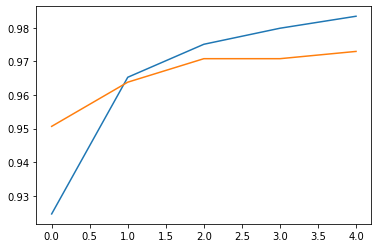

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Model 2

In [29]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [30]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 8s 144us/step - loss: 0.2593 - accuracy: 0.9199 - val_loss: 0.1653 - val_accuracy: 0.9480
Epoch 2/5
54000/54000 [==============================] - 8s 141us/step - loss: 0.1098 - accuracy: 0.9681 - val_loss: 0.1276 - val_accuracy: 0.9635
Epoch 3/5
54000/54000 [==============================] - 7s 138us/step - loss: 0.0801 - accuracy: 0.9755 - val_loss: 0.1177 - val_accuracy: 0.9672
Epoch 4/5
54000/54000 [==============================] - 8s 140us/step - loss: 0.0622 - accuracy: 0.9805 - val_loss: 0.1069 - val_accuracy: 0.9708
Epoch 5/5
54000/54000 [==============================] - 8s 141us/step - loss: 0.0502 - accuracy: 0.9851 - val_loss: 0.1135 - val_accuracy: 0.9705


In [31]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 33us/step


[0.10321083835801109, 0.9724000096321106]

In [32]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [33]:
model1.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.0799039e-11, 1.5522739e-06, 6.4689374e-08, 2.0915099e-06,
        6.5752932e-09, 2.5656144e-11, 6.7816660e-15, 9.9999857e-01,
        1.4168392e-08, 3.2414737e-06]], dtype=float32)

In [34]:
model1.predict(test_digits_sc[:10])

array([[1.0799101e-11, 1.5522785e-06, 6.4689246e-08, 2.0915058e-06,
        6.5752932e-09, 2.5656340e-11, 6.7816918e-15, 9.9999857e-01,
        1.4168393e-08, 3.2414830e-06],
       [5.8050778e-09, 1.2644335e-07, 9.9945247e-01, 2.1189024e-08,
        3.0746676e-09, 2.8023337e-08, 1.9031096e-07, 2.8385849e-09,
        1.1014737e-08, 3.0858963e-12],
       [5.7406570e-08, 9.9821794e-01, 3.2994238e-05, 1.8370014e-07,
        1.7900871e-05, 1.6039926e-06, 2.8092549e-05, 9.2079506e-07,
        2.0513549e-05, 3.0434947e-08],
       [9.9999982e-01, 2.3901121e-18, 3.7888873e-13, 7.7448808e-10,
        4.2093612e-12, 2.2916247e-09, 1.4611804e-06, 6.9532757e-15,
        4.3987841e-13, 5.7473801e-13],
       [2.8233123e-07, 4.4753374e-06, 3.3030537e-05, 6.3436563e-09,
        9.9941838e-01, 3.2896007e-06, 6.8944962e-07, 5.4544693e-05,
        3.6450274e-07, 5.7910060e-05],
       [6.7536848e-10, 9.9973357e-01, 3.5838582e-07, 2.2263740e-09,
        7.2243438e-07, 4.4345640e-08, 8.4301558e-07, 3.15

In [35]:
model1.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [36]:
model1.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.0799039e-11, 1.5522739e-06, 6.4689374e-08, 2.0915099e-06,
        6.5752932e-09, 2.5656144e-11, 6.7816660e-15, 9.9999857e-01,
        1.4168392e-08, 3.2414737e-06]], dtype=float32)

In [37]:
history.history

{'accuracy': [0.9198889, 0.96805555, 0.9755185, 0.9805, 0.98505557],
 'loss': [0.25930071382721265,
  0.10981707457853136,
  0.08012686385279866,
  0.0622242818399229,
  0.05015454599061222],
 'val_accuracy': [0.9480000138282776,
  0.9635000228881836,
  0.9671666622161865,
  0.9708333611488342,
  0.9704999923706055],
 'val_loss': [0.16528958805898825,
  0.12764966539045175,
  0.11774300374090671,
  0.10688701836888989,
  0.11352227711025625]}

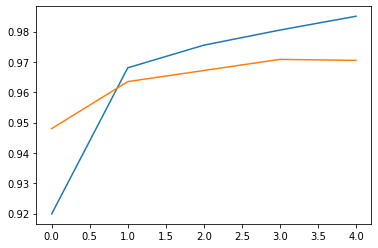

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

- The accuarcy and Val_Accuracy of the model 1 is :[0.10071307541152345, 0.9724000096321106]

- The accuarcy andVal_Accuracy of the model 2 is :[0.10321083835801109, 0.9724000096321106]

- Hence model 2 is best than model 1